In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
#from decoder_utils import *

In [6]:
#ca1_fn_dist_fp=r'D:\DATA\analysis\15lapstandarded\delay_lap summary\CA1\ca1_cor.mat'
#ca3_fn_dist_fp=r'D:\DATA\analysis\15lapstandarded\delay_lap summary\CA3\ca3_cor.mat'

CA1_score= np.load('ca1_1stlap_bylap_200_onePF_50bin_allanimal_1024.npy',allow_pickle=True)

CA3_score= np.load('ca3_1stlap_bylap_200_onePF_50bin_allanimal_1024.npy',allow_pickle=True)

#CA1_score2= np.load('ca1_1stlap_bylap_new_onePF_50bin_allanimal.npy',allow_pickle=True)

#CA3_score2= np.load('ca3_1stlap_bylap_new_onePF_50bin_allanimal.npy',allow_pickle=True)
#CA3_diff=np.load('x5_group_ca3nday2_diff.npy')

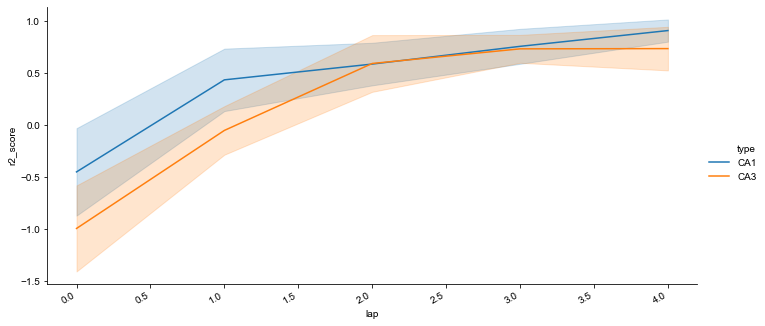

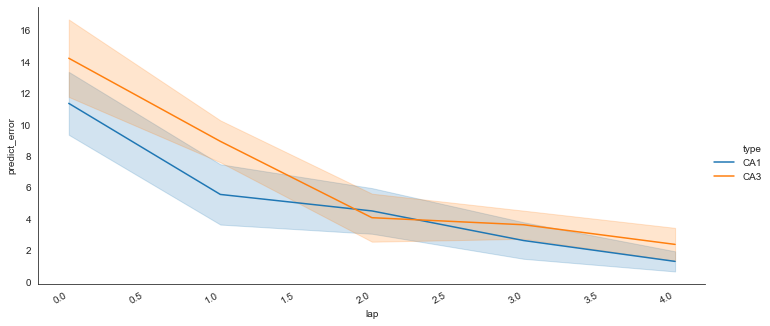

In [7]:
N_laps=CA1_score[0]['test_score'].shape[0]
N_trial=CA1_score.shape[0]
for t in range(2):
    if t==0:
        new_pd_dict = [{'lap': i, 'trial': j, 'r2_score': CA1_score[j]['test_score'][i], 'predict_error':CA1_score[j]['test_abs_diff'][i],'type':'CA1'} for i in range(N_laps) for j in range(N_trial)]
        #new_pd_dict += [{'lap': i, 'trial': j, 'r2_score': CA1_score2[j]['test_score'][i], 'predict_error':CA1_score2[j]['test_abs_diff'][i],'type':'CA1'} for i in range(N_laps) for j in range(N_trial)]
    else:
        new_pd_dict += [{'lap': i, 'trial': j, 'r2_score': CA3_score[j]['test_score'][i], 'predict_error':CA3_score[j]['test_abs_diff'][i],'type':'CA3'} for i in range(N_laps) for j in range(N_trial)]
        #ew_pd_dict += [{'lap': i, 'trial': j, 'r2_score': CA3_score2[j]['test_score'][i], 'predict_error':CA3_score2[j]['test_abs_diff'][i],'type':'CA3'} for i in range(N_laps) for j in range(N_trial)]
        #new_pd_dict.update({'lap': i, 'trial': j, 'r2_score': lap_s_test[j,i], 'predict_error':lap_d_test[j,i],'type':'CA3'} for i in range(N_laps) for j in range(N_trial)})


new_pd_result = pd.DataFrame(new_pd_dict)

g = sns.relplot(x="lap", y="r2_score", kind="line",ci="sd",hue='type', data=new_pd_result, aspect=2)
#g = sns.relplot(x="lap", y="r2_score", kind="line",ci="sd", data=pd_result, aspect=2)
sns.set_style("white")
g.fig.autofmt_xdate()


g = sns.relplot(x="lap", y="predict_error", kind="line",ci="sd",hue='type', data=new_pd_result, aspect=2)

#g = sns.relplot(x="lap", y="predict_error", kind="line",ci="sd", data=CA1_pd_result, aspect=2)
sns.set_style("white")
g.fig.autofmt_xdate()
#plt.ylim(0,18)
#g.savefig('CA1-CA3diff.png')

In [55]:
CA1score= np.load('ca1_1stlap_score_new_onePF_50bin_allanimal.npy')
#CA1_diff=np.load('groupca1nday1__diff.npy')

CA3score= np.load('ca1_1stlap_score_new_onePF_50bin_allanimal.npy')
#CA3_diff=np.load('groupca3nday1__diff.npy')

In [59]:
CA1score[0]

array([0.99719671])

In [58]:
stats.ttest_ind(CA1score[0],
                CA3score[0])

Ttest_indResult(statistic=array([0.]), pvalue=array([1.]))

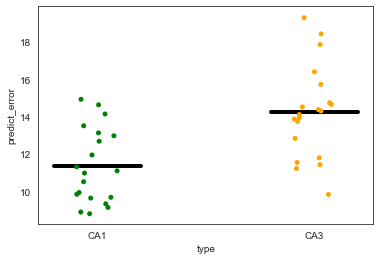

In [15]:
#for i in range(N_trial):
#A=np.any(new_pd_result['lap']==0 or new_pd_result['lap']==4
ax = sns.stripplot(x="type", y="predict_error",data=new_pd_result[(new_pd_result['lap']==0)],palette=["green","orange"],
                  dodge=True)

    #g = sns.relplot(x="lap", y="predict_error", kind="line",ci="sd", data=CA1_pd_result, aspect=2)
sns.set_style("white")
    #g.fig.autofmt_xdate()
    #plt.ylim(0,18)
    #g.savefig('CA1-CA3diff.png')
    #g.figure.savefig('CA1-CA3_lap_dot.png')


median_width = 0.4

for tick, text in zip(ax.get_xticks(), ax.get_xticklabels()):
    sample_name = text.get_text()  # "X" or "Y"

    # calculate the median value for all replicates of either X or Y
    mean_val = new_pd_result[(new_pd_result['lap']==0)&(new_pd_result['type']==sample_name)].predict_error.mean()
    #median_val = new_pd_result[(new_pd_result['lap']==sample_name)].predict_error.median()
    ## plot horizontal lines across the column, centered on the tick
    ax.plot([tick-median_width/2, tick+median_width/2], [mean_val, mean_val],
            lw=4, color='k')

#plt.show()
plt.savefig("CA1_CA3_first_lap_decoding_error_new.svg")

#g = sns.stripplot(x="type", y="predict_error", data=new_pd_result[new_pd_result['lap']==0])
#ax = sns.boxplot(x="day", y="total_bill", hue="weekend",
#                 data=tips, dodge=False)
#plt.figure(figsize=(7,10))
#ax = sns.boxplot(x="type", y="predict_error", 
#                   data=new_pd_result[(new_pd_result['lap']==0)],dodge=False,showfliers=False)
#ax = sns.stripplot(x="type", y="predict_error", 
#                   data=new_pd_result[(new_pd_result['lap']==0)],marker="$\circ$",size=20,dodge=True,
#                   alpha=0.6)
#plt.savefig("CA1_CA3_first_lap_decoding_error_v2.svg")

DABEST v0.3.0
             
Good afternoon!
The current time is Thu Jun  4 16:21:19 2020.

The unpaired mean difference between CA1 and CA3 is 2.87 [95%CI 1.48, 4.18].
The p-value of the two-sided permutation t-test is 0.0004. 

5000 bootstrap samples were taken; the confidence interval is bias-corrected and accelerated.
The p-value(s) reported are the likelihood(s) of observing the effect size(s),
if the null hypothesis of zero difference is true.
For each p-value, 5000 reshuffles of the control and test labels were performed.

To get the results of all valid statistical tests, use `.mean_diff.statistical_tests`

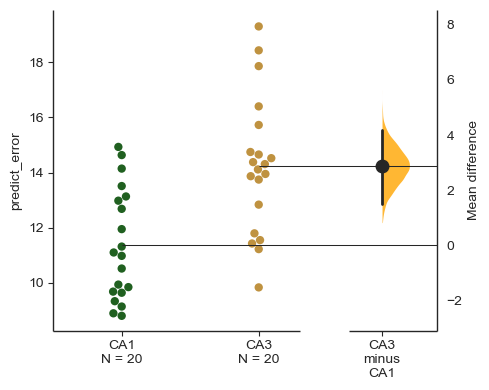

In [17]:
import dabest
error_dabest = dabest.load(data=new_pd_result[(new_pd_result['lap']==0)], x="type", y="predict_error",
                          idx=("CA1", "CA3"))

# Produce a Cumming estimation plot.
error_dabest.mean_diff.plot(custom_palette=["green","orange"]);
plt.savefig("CA1_CA3_first_lap_decoding_error_new+dabest.svg")
error_dabest.mean_diff

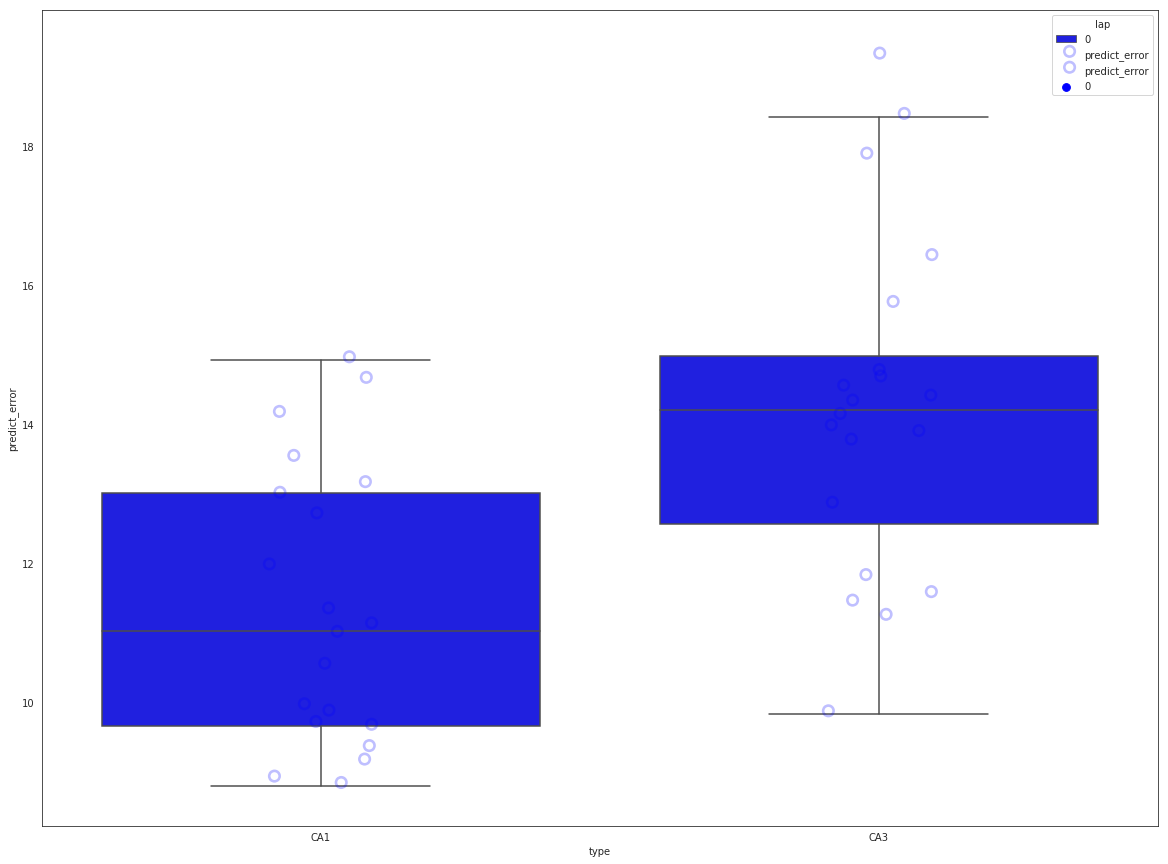

In [94]:
plt.figure(figsize=(20,15))
ax = sns.boxplot(x="type", y="predict_error", hue='lap',
                   data=new_pd_result[(new_pd_result['lap']==0)], palette=["blue","red"], dodge=True,showfliers=False)
ax = sns.stripplot(x="type", y="predict_error", hue='lap',
                   data=new_pd_result[(new_pd_result['lap']==0)],palette=["blue","red"],marker="$\circ$",size=20,dodge=True,
                   alpha=0.25)

In [95]:
stats.ttest_ind(new_pd_result[(new_pd_result['lap']==0)&(new_pd_result['type']=='CA1')].predict_error,
                new_pd_result[(new_pd_result['lap']==0)&(new_pd_result['type']=='CA3')].predict_error)

Ttest_indResult(statistic=-4.044484622820053, pvalue=0.0002474164133284144)

In [50]:
CA1_score[0]['test_predict'].shape
print(str(1))

1


/home/hanyu/workspace/can/decoder_utils.py:851: RuntimeWarning: invalid value encountered in true_divide
  cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


Normalized confusion matrix
0


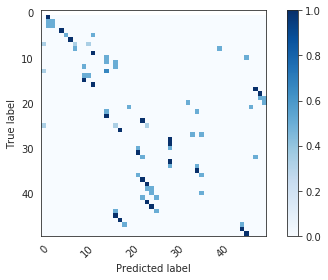

Normalized confusion matrix
1


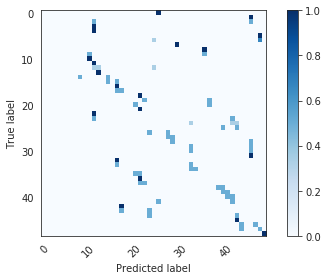

Normalized confusion matrix
2


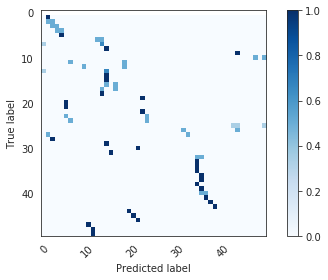

Normalized confusion matrix
3


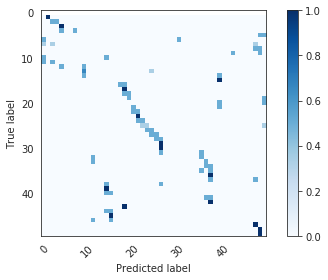

Normalized confusion matrix
4


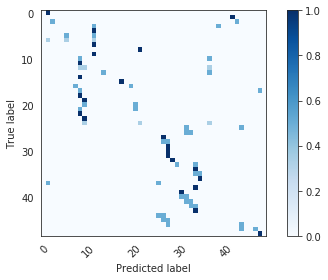

Normalized confusion matrix
5


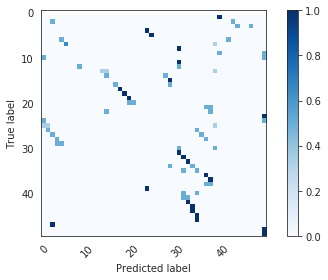

Normalized confusion matrix
6


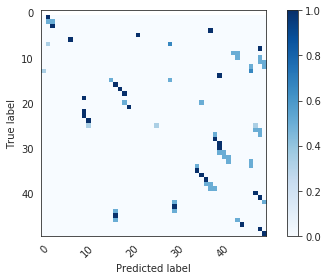

Normalized confusion matrix
7


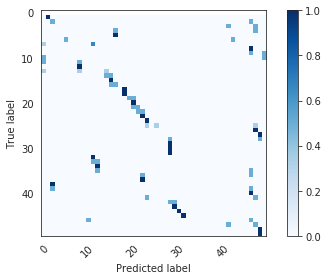

Normalized confusion matrix
8


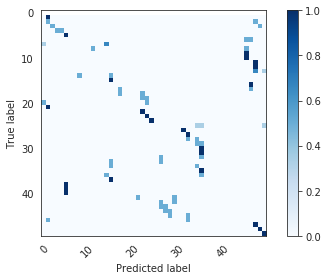

Normalized confusion matrix
9


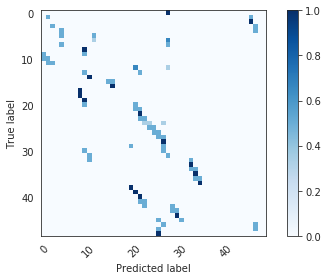

Normalized confusion matrix
10


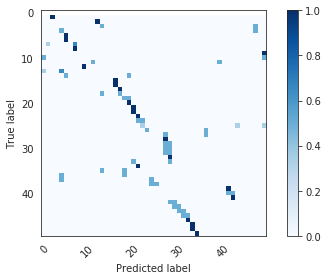

Normalized confusion matrix
11


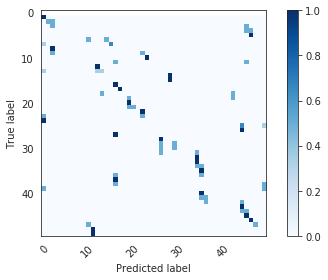

Normalized confusion matrix
12


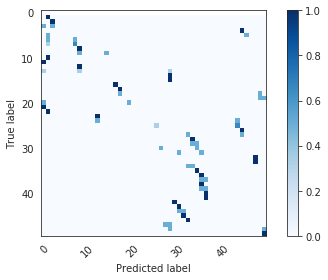

Normalized confusion matrix
13


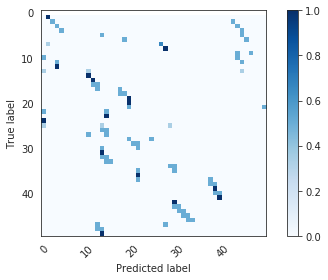

Normalized confusion matrix
14


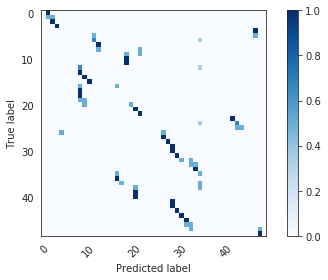

Normalized confusion matrix
15


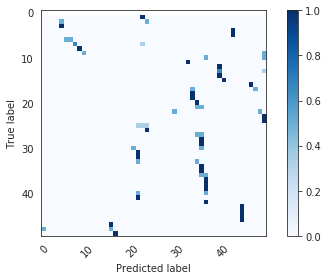

Normalized confusion matrix
16


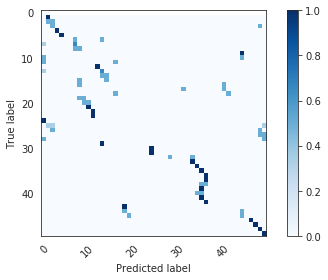

Normalized confusion matrix
17


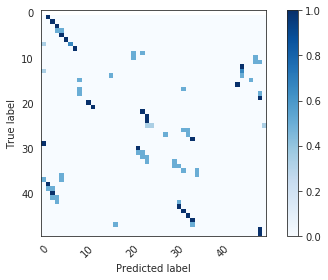

Normalized confusion matrix
18


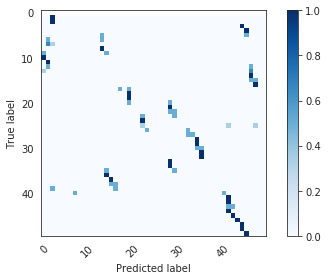

Normalized confusion matrix
19


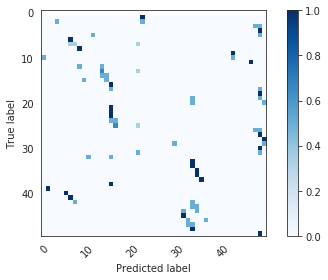

In [8]:
for i in range(20):
#print(sample_nametr(1)
  test_group_pos=CA1_score[i]['test_pos']
  y_test_pre_inverse=CA1_score[i]['test_predict']
  bin_num=50
  bins_before=6
  bins_after=6

  from sklearn.model_selection import train_test_split
  from sklearn.metrics import confusion_matrix
  from sklearn.utils.multiclass import unique_labels

  class_names = np.arange(0,bin_num+1)


  np.set_printoptions(precision=2)

  test_group_pos=test_group_pos.astype('int32')
  y_test_pre_inverse=y_test_pre_inverse.astype('int32')


  plot_confusion_matrix((test_group_pos[bins_before:112-bins_after-1]), (y_test_pre_inverse[0:99]), classes=class_names, normalize=True,
                        title='matrix'+str(i))
  print(i)

  plt.show()

Normalized confusion matrix
0


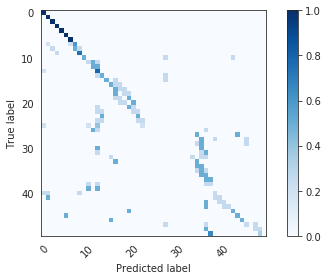

Normalized confusion matrix
1


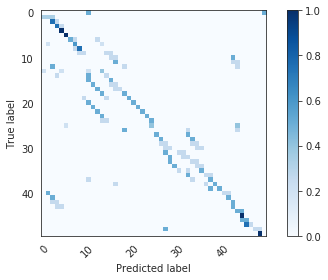

Normalized confusion matrix
2


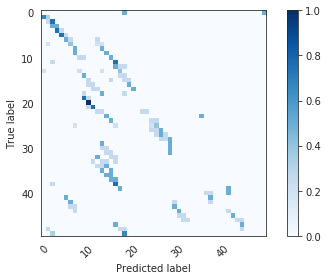

Normalized confusion matrix
3


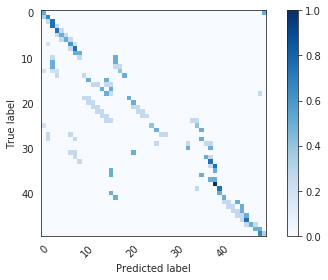

Normalized confusion matrix
4


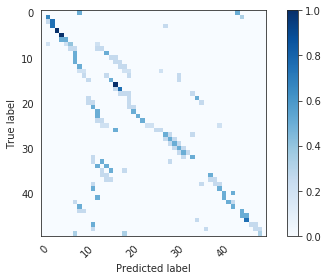

Normalized confusion matrix
5


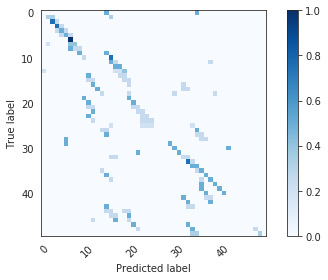

Normalized confusion matrix
6


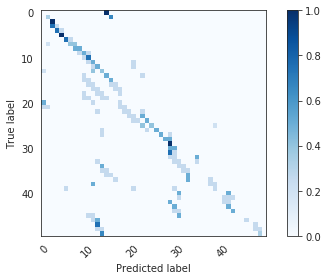

Normalized confusion matrix
7


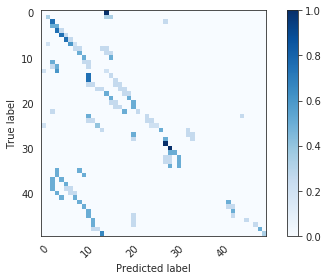

Normalized confusion matrix
8


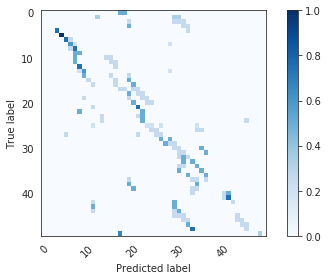

Normalized confusion matrix
9


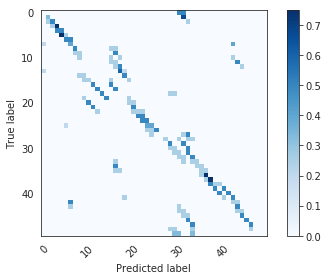

Normalized confusion matrix
10


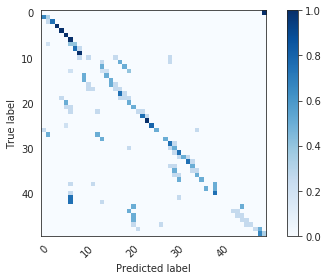

Normalized confusion matrix
11


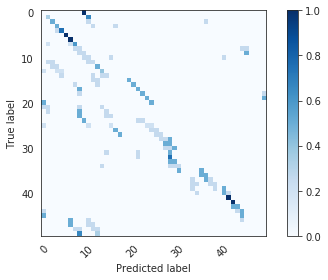

Normalized confusion matrix
12


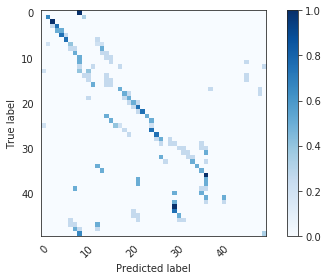

Normalized confusion matrix
13


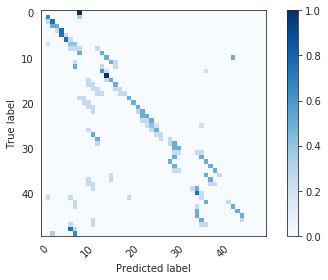

Normalized confusion matrix
14


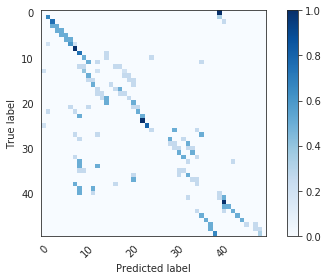

Normalized confusion matrix
15


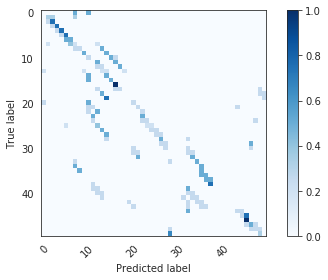

Normalized confusion matrix
16


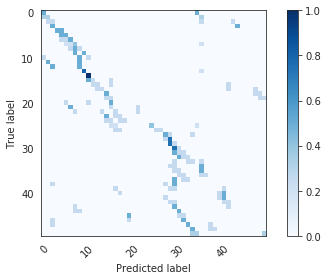

Normalized confusion matrix
17


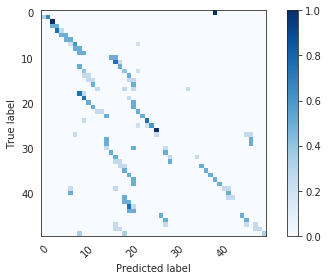

Normalized confusion matrix
18


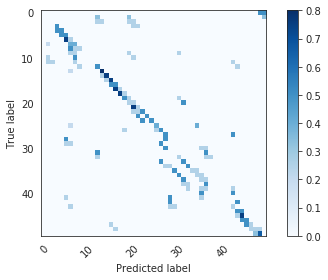

Normalized confusion matrix
19


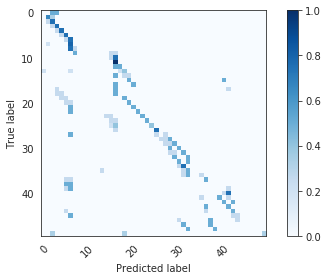

Normalized confusion matrix
20


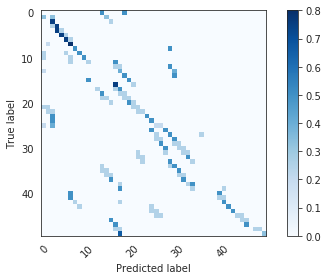

Normalized confusion matrix
21


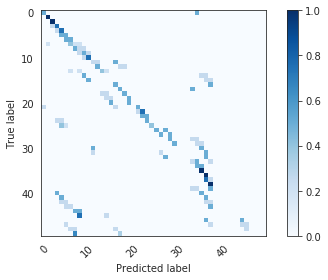

Normalized confusion matrix
22


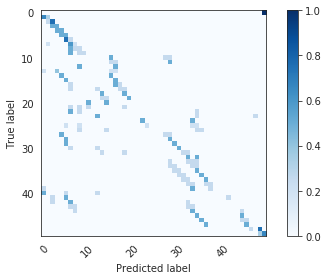

Normalized confusion matrix
23


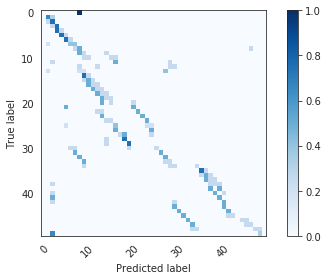

Normalized confusion matrix
24


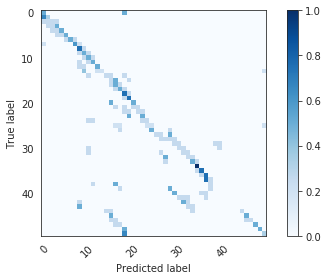

Normalized confusion matrix
25


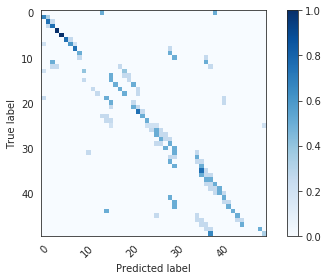

Normalized confusion matrix
26


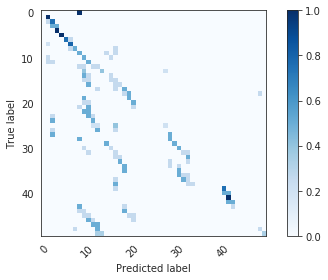

Normalized confusion matrix
27


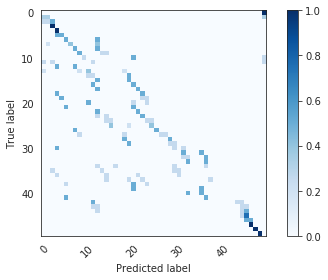

Normalized confusion matrix
28


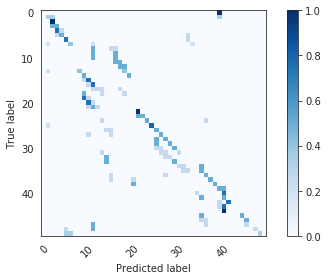

Normalized confusion matrix
29


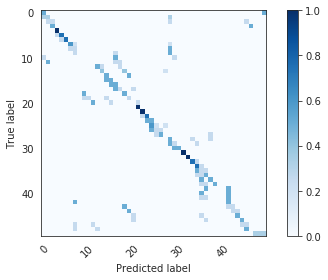

Normalized confusion matrix
30


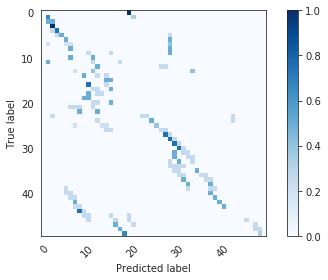

Normalized confusion matrix
31


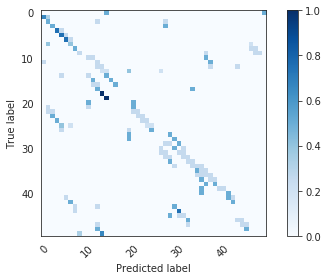

Normalized confusion matrix
32


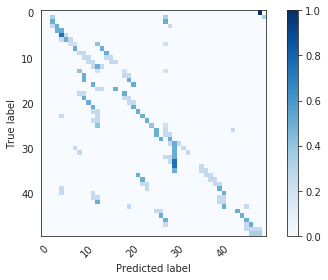

Normalized confusion matrix
33


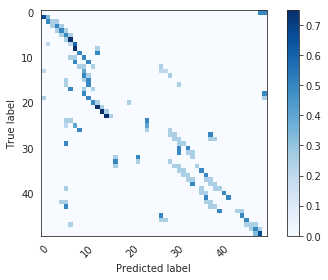

Normalized confusion matrix
34


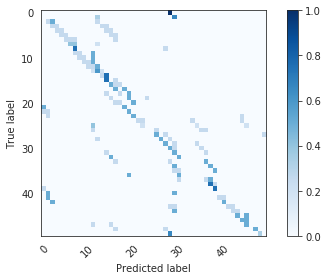

Normalized confusion matrix
35


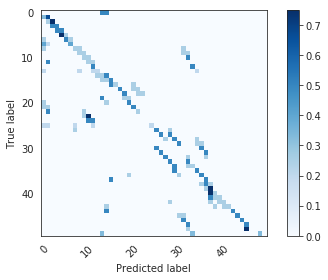

Normalized confusion matrix
36


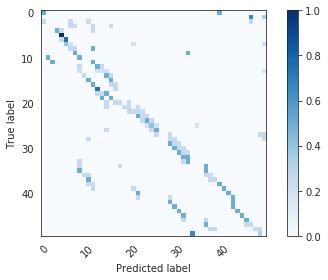

Normalized confusion matrix
37


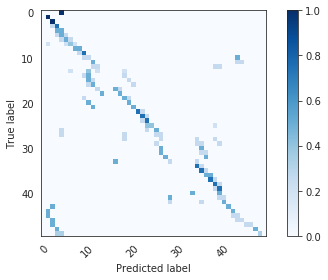

Normalized confusion matrix
38


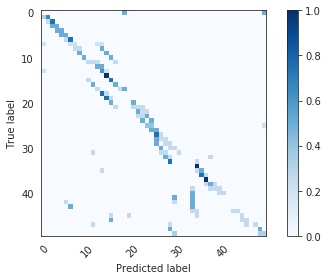

Normalized confusion matrix
39


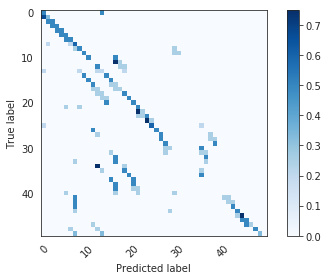

Normalized confusion matrix
40


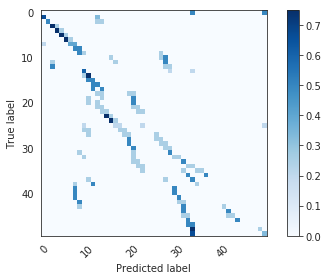

Normalized confusion matrix
41


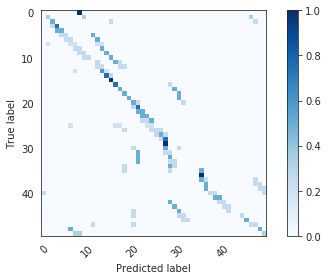

Normalized confusion matrix
42


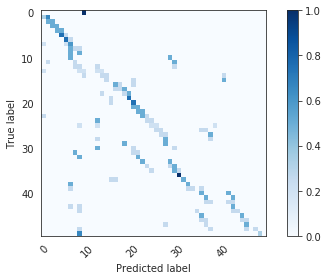

Normalized confusion matrix
43


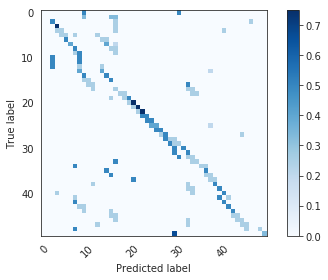

Normalized confusion matrix
44


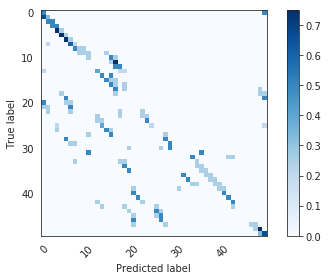

Normalized confusion matrix
45


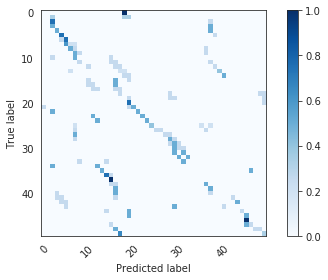

Normalized confusion matrix
46


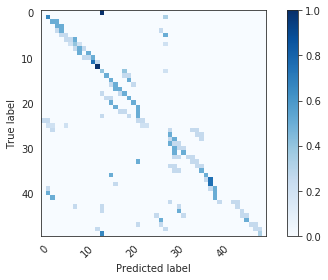

Normalized confusion matrix
47


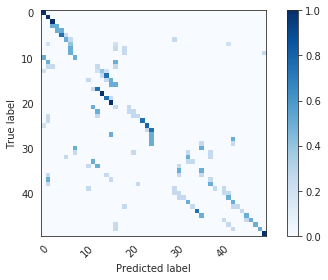

Normalized confusion matrix
48


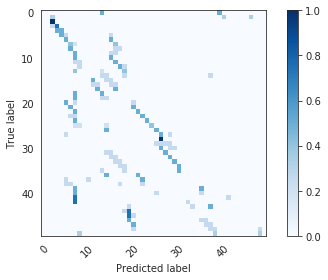

Normalized confusion matrix
49


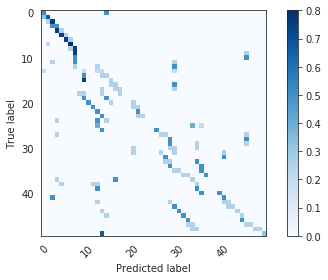

In [64]:
for i in range(50):
#print(sample_nametr(1)
  test_group_pos=CA1_score[i]['test_pos']
  y_test_pre_inverse=CA1_score[i]['test_predict']
  bin_num=50
  bins_before=6
  bins_after=6

  from sklearn.model_selection import train_test_split
  from sklearn.metrics import confusion_matrix
  from sklearn.utils.multiclass import unique_labels

  class_names = np.arange(0,bin_num+1)


  np.set_printoptions(precision=2)

  test_group_pos=test_group_pos.astype('int32')
  y_test_pre_inverse=y_test_pre_inverse.astype('int32')


  plot_confusion_matrix((test_group_pos[bins_before:212-bins_after-1]), (y_test_pre_inverse[0:199]), classes=class_names, normalize=True,
                        title='matrix'+str(i))
  print(i)

  plt.show()

In [ ]:
test_group_pos=CA1_score[10]['test_pos']
y_test_pre_inverse=CA1_score[10]['test_predict']
bin_num=50
bins_before=6
bins_after=6

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels

class_names = np.arange(0,bin_num+1)


np.set_printoptions(precision=2)

test_group_pos=test_group_pos.astype('int32')
y_test_pre_inverse=y_test_pre_inverse.astype('int32')


plot_confusion_matrix((test_group_pos[bins_before:112-bins_after-1]), (y_test_pre_inverse[0:99]), classes=class_names, normalize=True,
                      title='matrix'+str(i))
#print(i)

plt.show()

Normalized confusion matrix


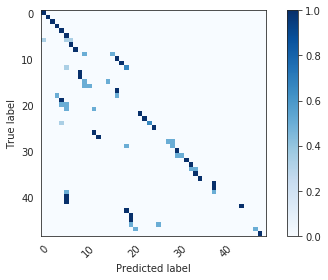

<Figure size 432x288 with 0 Axes>

In [70]:
test_group_pos=CA1_score[10]['test_pos']
y_test_pre_inverse=CA1_score[10]['test_predict']
bin_num=50
bins_before=6
bins_after=6

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels

class_names = np.arange(0,bin_num+1)


np.set_printoptions(precision=2)

test_group_pos=test_group_pos.astype('int32')
y_test_pre_inverse=y_test_pre_inverse.astype('int32')


plot_confusion_matrix((test_group_pos[bins_before:112-bins_after-1]), (y_test_pre_inverse[0:99]), classes=class_names, normalize=True,
                      title='matrix'+str(i))
#print(i)

plt.show()
plt.savefig("CA1_LSTM_first_lap_example.svg")

Normalized confusion matrix


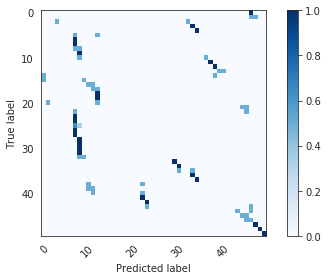

<Figure size 432x288 with 0 Axes>

In [10]:
test_group_pos=CA3_score[9]['test_pos']
y_test_pre_inverse=CA3_score[9]['test_predict']
bin_num=50
bins_before=6
bins_after=6

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels

class_names = np.arange(0,bin_num+1)


np.set_printoptions(precision=2)

test_group_pos=test_group_pos.astype('int32')
y_test_pre_inverse=y_test_pre_inverse.astype('int32')


plot_confusion_matrix((test_group_pos[bins_before:112-bins_after-1]), (y_test_pre_inverse[0:99]), classes=class_names, normalize=True,
                      title='matrix'+str(i))
#print(i)

plt.show()
plt.savefig("CA3_LSTM_first_lap_example.svg")